## <mark><span style = "color:red">***Titanic : Survival prediction*** </span> </mark>
#### _the goal is to correctly predict if someone survived the shipwreck_ 

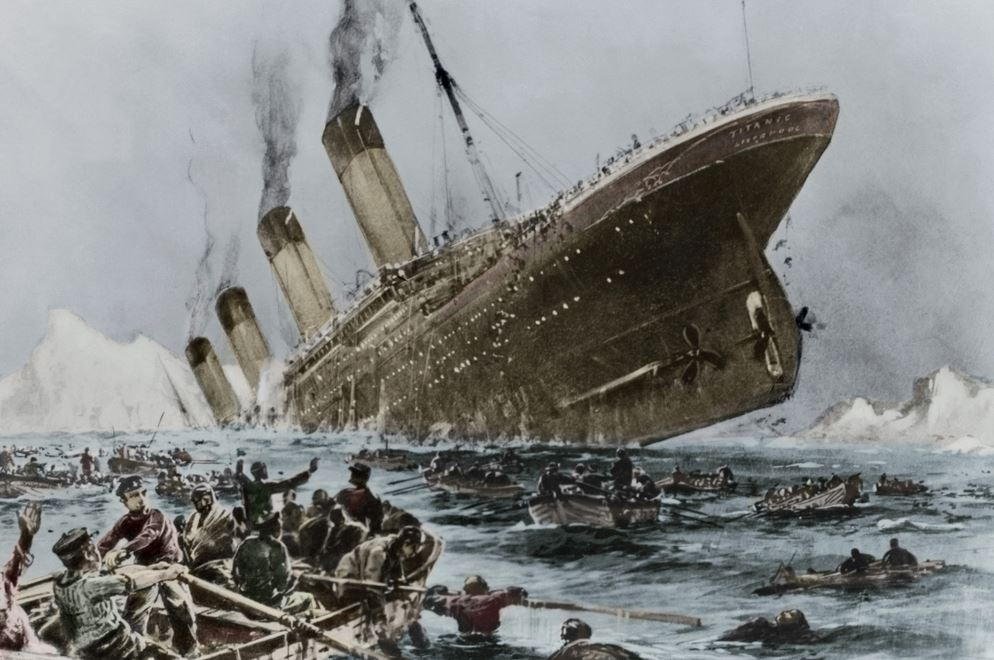

## <mark>1.Importing Liberary</mark>

In [150]:
import pandas as pd 
import numpy  as np 
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None) # To display all columns in the dataframe

## <mark>2.Reading data </mark>

In [151]:
df_train = pd.read_csv("Dataset/train.csv")
df_test = pd.read_csv("Dataset/test.csv") 

In [152]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## <mark>3.data Cleaning </mark>

><mark>Filtering Out unnecessary columns</mark> 
>>drop name,Ticket, and Cabin number because it is not useful

In [153]:
df_train['Title'] = df_train['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
df_train['family_size'] = df_train['SibSp'] + df_train['Parch']
df_test['Title'] = df_test['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
df_test['family_size'] = df_test['SibSp'] + df_test['Parch']
df_train.drop(columns=['Name' , 'Ticket'] , inplace=True) 
df_test.drop(columns=['Name' , 'Ticket'] , inplace=True)

><mark>Rename some columns</mark>

In [154]:
df_train.rename(columns= {'PassengerId' : 'ID' , 'Pclass' : 'class' , 'SibSp': 'Sibiling_Spouse' , 'Parch' : 'Parent_Child' , 'Embarked' : 'Port'} , inplace= True)
df_test.rename(columns= {'PassengerId' : 'ID' , 'Pclass' : 'class' , 'SibSp': 'Sibiling_Spouse' , 'Parch' : 'Parent_Child' , 'Embarked' : 'Port'} , inplace= True) 

><mark>make Id is the the index</mark> 

In [155]:
df_train.set_index('ID' , inplace=True)

In [156]:
df_test.set_index('ID' , inplace=True)

><mark>Missing value Check</mark>

In [157]:
df_train.isna().sum()

Survived             0
class                0
Sex                  0
Age                177
Sibiling_Spouse      0
Parent_Child         0
Fare                 0
Cabin              687
Port                 2
Title                0
family_size          0
dtype: int64

In [158]:
df_train[df_train['Port'].isna() ]

,Survived,class,Sex,Age,Sibiling_Spouse,Parent_Child,Fare,Cabin,Port,Title,family_size
ID,,,,,,,,,,,
62,1,1,female,38.0,0,0,80.0,B28,NaN,Miss,0
830,1,1,female,62.0,0,0,80.0,B28,NaN,Mrs,0


In [159]:
df_train[df_train['Age'].isna() ]

,Survived,class,Sex,Age,Sibiling_Spouse,Parent_Child,Fare,Cabin,Port,Title,family_size
ID,,,,,,,,,,,
6,0,3,male,NaN,0,0,8.4583,NaN,Q,Mr,0
18,1,2,male,NaN,0,0,13.0000,NaN,S,Mr,0
20,1,3,female,NaN,0,0,7.2250,NaN,C,Mrs,0
27,0,3,male,NaN,0,0,7.2250,NaN,C,Mr,0
29,1,3,female,NaN,0,0,7.8792,NaN,Q,Miss,0
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,male,NaN,0,0,7.2292,NaN,C,Mr,0
864,0,3,female,NaN,8,2,69.5500,NaN,S,Miss,10
869,0,3,male,NaN,0,0,9.5000,NaN,S,Mr,0


In [160]:
df_train[df_train['Age'].isna() & df_train['Port'].isna()  ]

,Survived,class,Sex,Age,Sibiling_Spouse,Parent_Child,Fare,Cabin,Port,Title,family_size
ID,,,,,,,,,,,


>no intersection between missing value of 'Age'  and 'Port' so total rows that has 'Nan' is 179 row

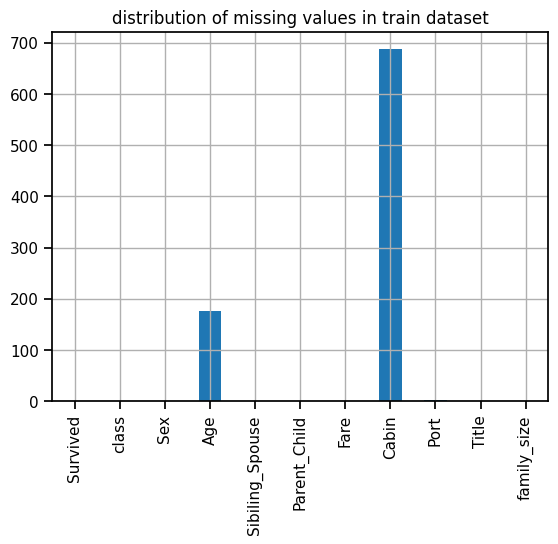

In [161]:
df_train.isna().sum().plot(kind='bar')
plt.title('distribution of missing values in train dataset')
plt.grid()
plt.show()

In [162]:
df_train.describe()

,Survived,class,Age,Sibiling_Spouse,Parent_Child,Fare,family_size
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


[Text(0, 0, 'Southampton'), Text(1, 0, 'Cherbourg'), Text(2, 0, 'Queenstown')]

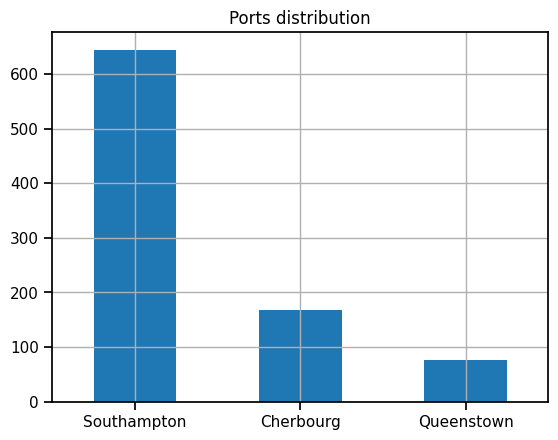

In [163]:
PortHistGraph= df_train['Port'].value_counts().plot(kind='bar')
plt.title('Ports distribution')
plt.grid()
PortHistGraph.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'], rotation = 0)

>most of the passenger get on board from southampton

>drawing histograms for other numeric columns

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Sibiling_Spouse'}>,
        <Axes: title={'center': 'Parent_Child'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'family_size'}>, <Axes: >, <Axes: >]],
      dtype=object)

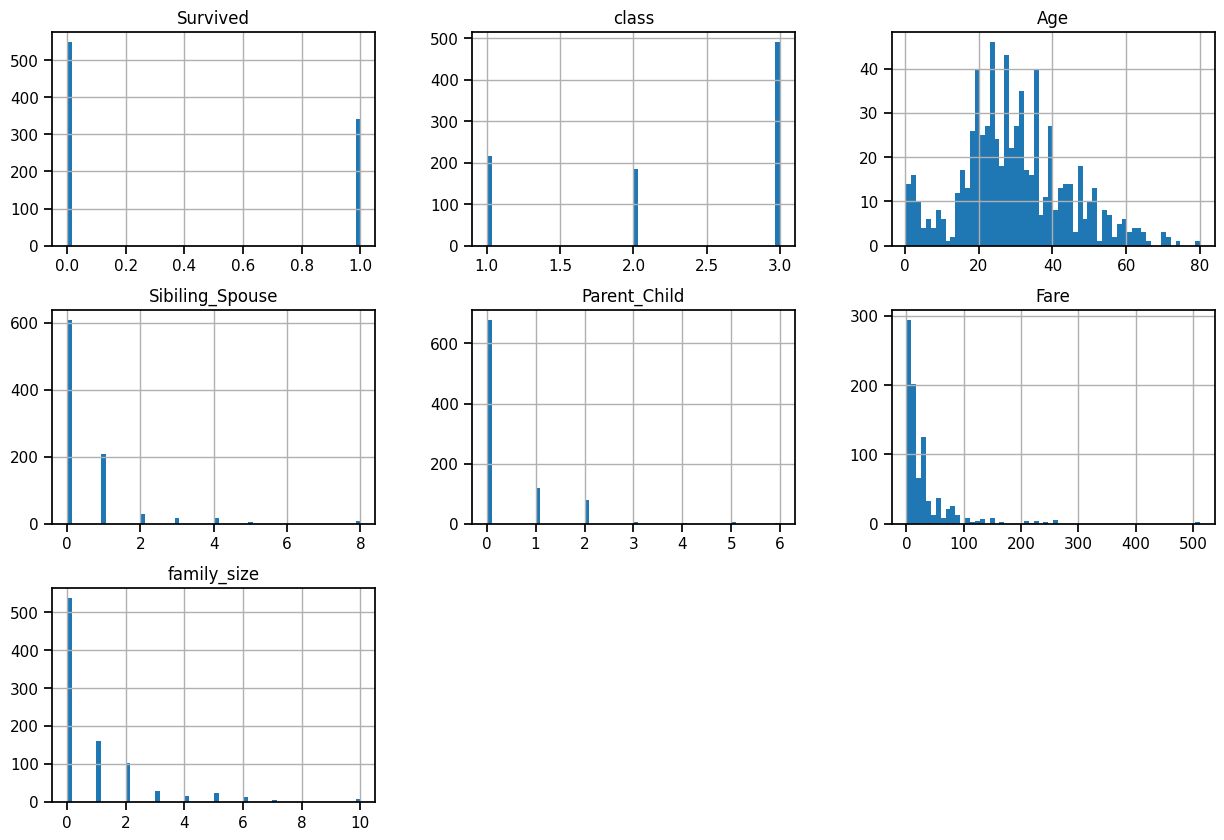

In [164]:
df_train.hist(bins = 60 , figsize=(15,10)) 

>Replacing the missing value in 'Age' and 'Port' columns according the<a href= "https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/"> distribution of data  </a>

Text(0.5, 1.0, 'Age box plot distribution')

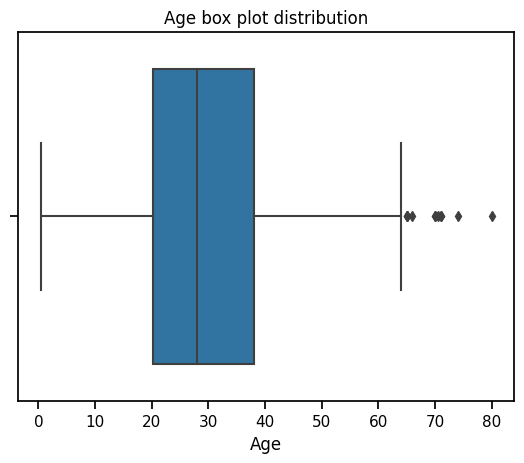

In [165]:
sb.boxplot(x='Age' , data=df_train)
plt.title('Age box plot distribution')


>Since, there exit lots of outliers, replacing missing values with the mean is not the best thing because outlier effects the mean , we wil use median instead

In [166]:
df_train['Age'].fillna(df_train['Age'].median() , inplace=True)
df_test['Age'].fillna(df_train['Age'].median() , inplace=True)

In [167]:
df_train['Port'].fillna('S' , inplace=True)
df_test['Port'].fillna('S' , inplace=True)

In [168]:
df_train.isna().sum()

Survived             0
class                0
Sex                  0
Age                  0
Sibiling_Spouse      0
Parent_Child         0
Fare                 0
Cabin              687
Port                 0
Title                0
family_size          0
dtype: int64

## <mark>4.data Exploring </mark>

>Exploring the relation between survivals and every coloumn in the graph

><mark>1.Survival Vs class </mark>

In [169]:
df_Class_Vs_Survived = df_train.groupby('class')['Survived'].value_counts(normalize=True).to_frame()
df_Class_Vs_Survived

Survived
class Survived          
1     1         0.629630
      0         0.370370
2     0         0.527174
      1         0.472826
3     0         0.757637
      1         0.242363

In [170]:
df_Class_Vs_Survived.rename(columns = {'Survived' : 'Survived_Rate'}, inplace = True)
df_Class_Vs_Survived.reset_index(level=None, drop=False, inplace=True, col_level=0)
df_Class_Vs_Survived


,class,Survived,Survived_Rate
0,1,1,0.629630
1,1,0,0.370370
2,2,0,0.527174
3,2,1,0.472826
4,3,0,0.757637
5,3,1,0.242363


In [171]:
#df_Class_Vs_Survived['class']
df_notSurvived = df_Class_Vs_Survived[df_Class_Vs_Survived["Survived"] == 0]
df_notSurvived
#df_Class_Vs_Survived['NotSurvived'] = 

,class,Survived,Survived_Rate
1,1,0,0.370370
2,2,0,0.527174
4,3,0,0.757637


In [172]:
df_notSurvived.drop(["Survived"], axis=1,inplace = True)
df_Class_Vs_Survived.drop([1,2,4] , axis=0,inplace = True )

c:\Users\Mohamed Heggi\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [173]:
df_Class_Vs_Survived.drop(["Survived"], axis=1,inplace = True)

In [174]:
df_notSurvived.rename(columns = {'Survived_Rate' : 'NotSurvived_Rate'}, inplace = True)

In [175]:
result = pd.merge(df_notSurvived, df_Class_Vs_Survived, on = 'class')
result.set_index('class', inplace = True)

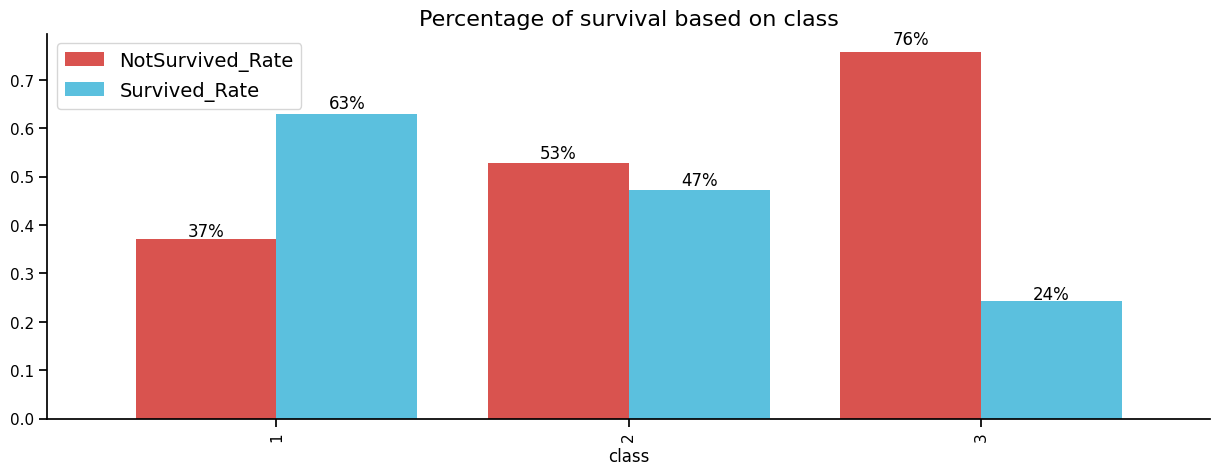

In [176]:
colors_list = ['#d9534f','#5bc0de',]
ax = result.plot(kind='bar',figsize=(15,5),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=result.columns,fontsize= 14)
plt.title("Percentage of survival based on class",fontsize= 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')



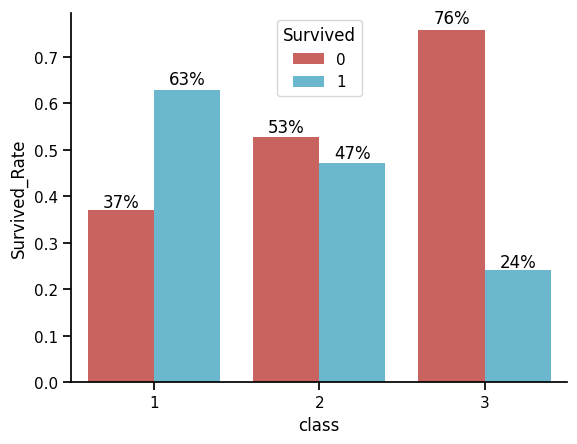

In [177]:
# another way of plotting the above graph using seaborn
g= sb.barplot(data = df_train.groupby('class')['Survived'].value_counts(normalize=True).to_frame().rename(columns= {"Survived":"Survived_Rate" }).reset_index() , x= "class" , y= "Survived_Rate" ,hue = "Survived" , palette=colors_list  )
sb.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
for p in g.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    g.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


<div class="alert alert-block alert-success">
<b>Conclusion 1:</b> from above graphs and table passengers from 1st class are having a highest chance of survival (62.96%) , On the other hand , the lowest chance to survival are to 3rd class (24.23%)
</div>

><mark>2.Survival Vs Sex </mark>

Text(0.5, 1.0, 'female  and make distribution')

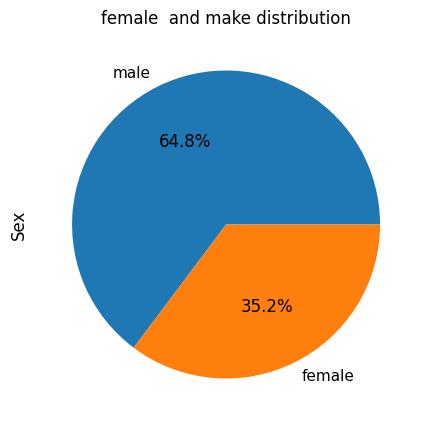

In [178]:
df_train['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%' , figsize=(5,5))
plt.title('female  and make distribution')

In [179]:
sb.set_context('notebook')
sb.set_palette('tab10')
df_survival_Vs_Sex= df_train.groupby('Sex')['Survived'].mean().to_frame()
df_survival_Vs_Sex


,Survived
Sex,
female,0.742038
male,0.188908


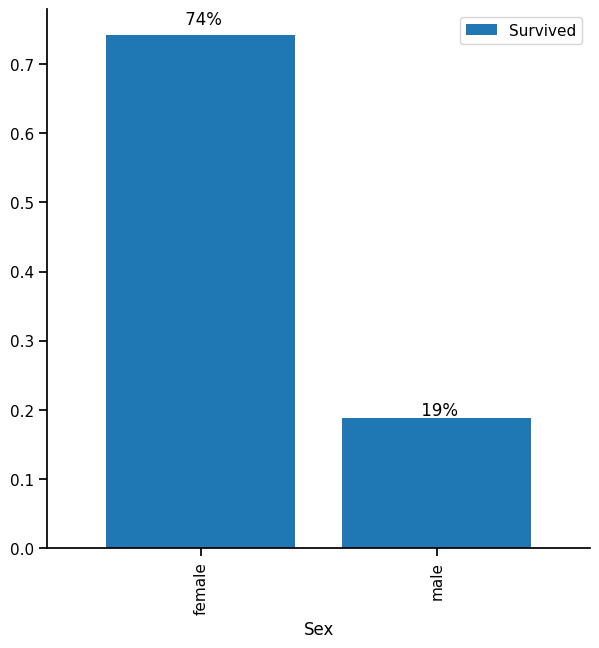

In [180]:
graph = df_survival_Vs_Sex.plot(kind="bar" , figsize= (7,7), width = 0.8)
graph.spines['right'].set_visible(False)
graph.spines['top'].set_visible(False)
graph.spines['left'].set_visible(True)
graph.spines['bottom'].set_visible(True)
for i in graph.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy() 
    graph.annotate(f'{height : .0%}', (x + width/2, y + height*1.02),ha='center')

<div class="alert alert-block alert-success">
<b>Conclusion 2:</b> From the above table Females have higher chance of survival  (74.2038 %).
- Despite the exist of high percentage of male in the data . the percentage of Survived female is more than Survived male 
</div>

><mark>3.Survival Vs Parent_child</mark>

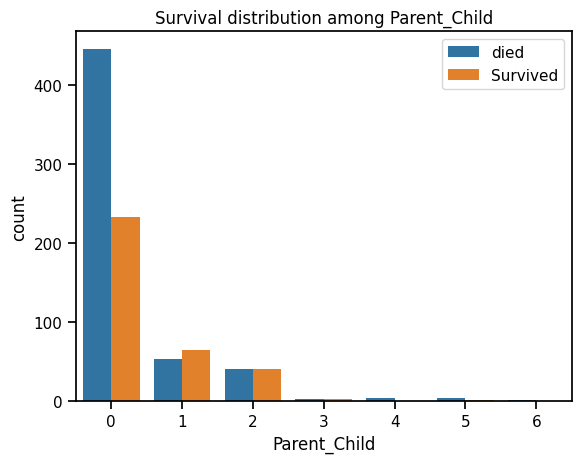

In [181]:
sb.countplot(x=df_train['Parent_Child'], hue=df_train['Survived'])
plt.title('Survival distribution among Parent_Child')
plt.legend(labels=['died', 'Survived'])

In [182]:
total= df_train.groupby('Parent_Child')['Survived'].value_counts(normalize=True).sort_index(ascending=True).to_frame()
total

Survived
Parent_Child Survived          
0            0         0.656342
             1         0.343658
1            0         0.449153
             1         0.550847
2            0         0.500000
             1         0.500000
3            0         0.400000
             1         0.600000
4            0         1.000000
5            0         0.800000
             1         0.200000
6            0         1.000000

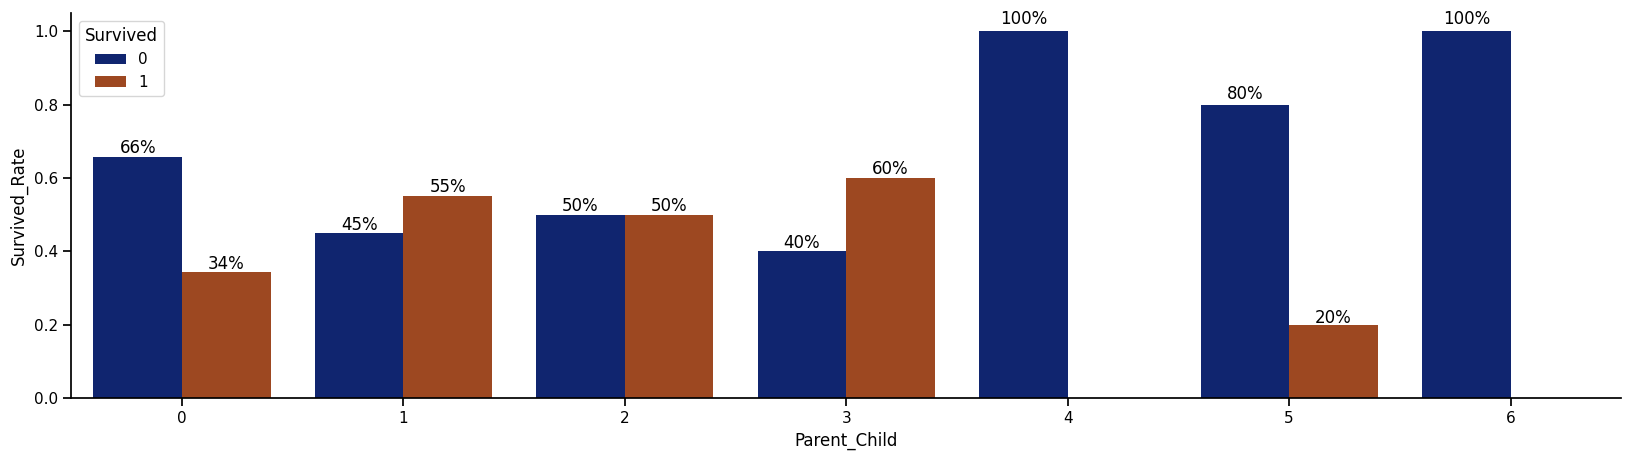

In [183]:
# another way of plotting the above graph using seaborn
plt.figure(figsize=(20,5))
g= sb.barplot(data = df_train.groupby('Parent_Child')['Survived'].value_counts(normalize=True).sort_index(ascending=True).to_frame().rename(columns= {"Survived":"Survived_Rate" }).reset_index() , x= "Parent_Child" , y= "Survived_Rate" ,hue = "Survived" , palette=sb.color_palette('dark', 10),width = 0.8)
sb.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
for p in g.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    g.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


<Axes: >

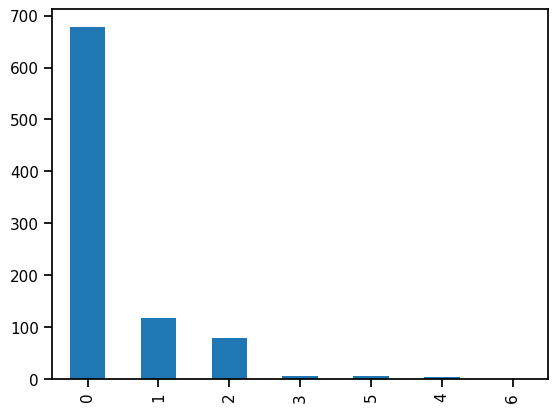

In [184]:
df_train['Parent_Child'].value_counts().plot(kind = "bar")

<div class="alert alert-block alert-success">
<b>Conclusion 3:</b>It seems that there is no exact relation between increasing the number of parents and number of survival because the percentages of if survival increase until it reaches '3' then decrease again
</div>

><mark>4.Survival Vs Sibiling_Spouse</mark>

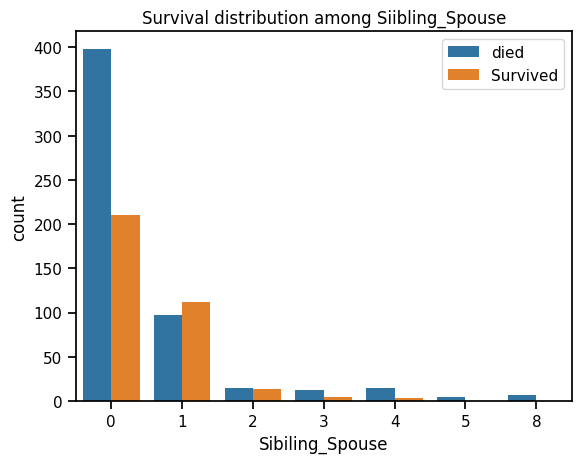

In [185]:
sb.countplot(x=df_train['Sibiling_Spouse'], hue=df_train['Survived'])
plt.title('Survival distribution among Siibling_Spouse')
plt.legend(labels=['died', 'Survived'])

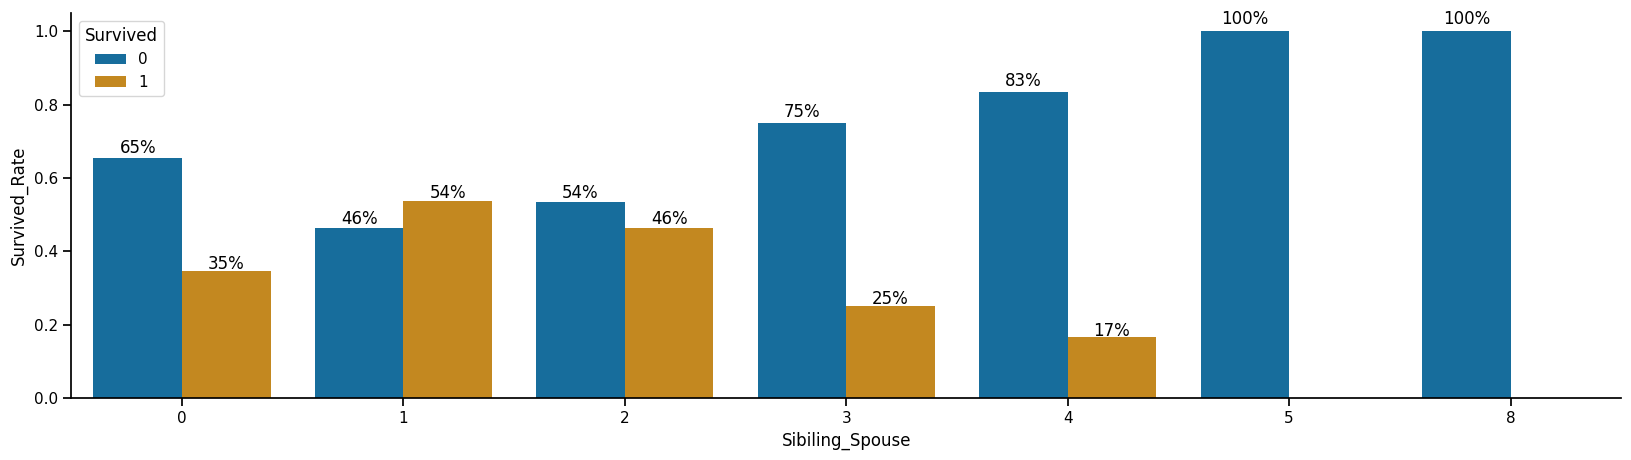

In [186]:

plt.figure(figsize=(20,5))
g= sb.barplot(data = df_train.groupby('Sibiling_Spouse')['Survived'].value_counts(normalize=True).sort_index(ascending=True).to_frame().rename(columns= {"Survived":"Survived_Rate" }).reset_index() , x= "Sibiling_Spouse" , y= "Survived_Rate" ,hue = "Survived" , palette=sb.color_palette('colorblind', 10),width = 0.8)
sb.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
for p in g.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    g.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

<Axes: >

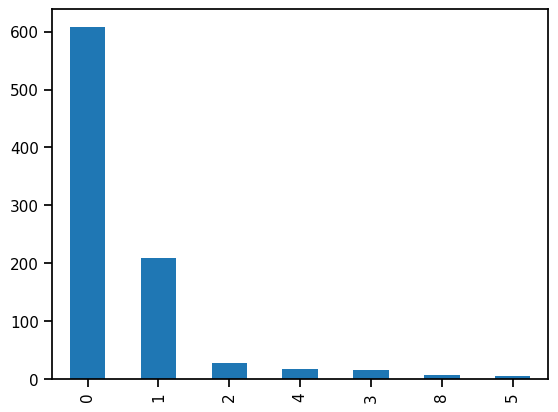

In [187]:
df_train['Sibiling_Spouse'].value_counts().plot(kind = "bar")

<div class="alert alert-block alert-success">
<b>Conclusion 4:</b>passengers having 5 or 8 spouses/Sibillings have lower chance of survival. Best chance of survival lie between having 1 or 2 percent</div>

><mark>5.Survival Vs Age</mark>

In [188]:
df_train

,Survived,class,Sex,Age,Sibiling_Spouse,Parent_Child,Fare,Cabin,Port,Title,family_size
ID,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S,Mr,1
2,1,1,female,38.0,1,0,71.2833,C85,C,Mrs,1
3,1,3,female,26.0,0,0,7.9250,NaN,S,Miss,0
4,1,1,female,35.0,1,0,53.1000,C123,S,Mrs,1
5,0,3,male,35.0,0,0,8.0500,NaN,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S,Rev,0
888,1,1,female,19.0,0,0,30.0000,B42,S,Miss,0
889,0,3,female,28.0,1,2,23.4500,NaN,S,Miss,3


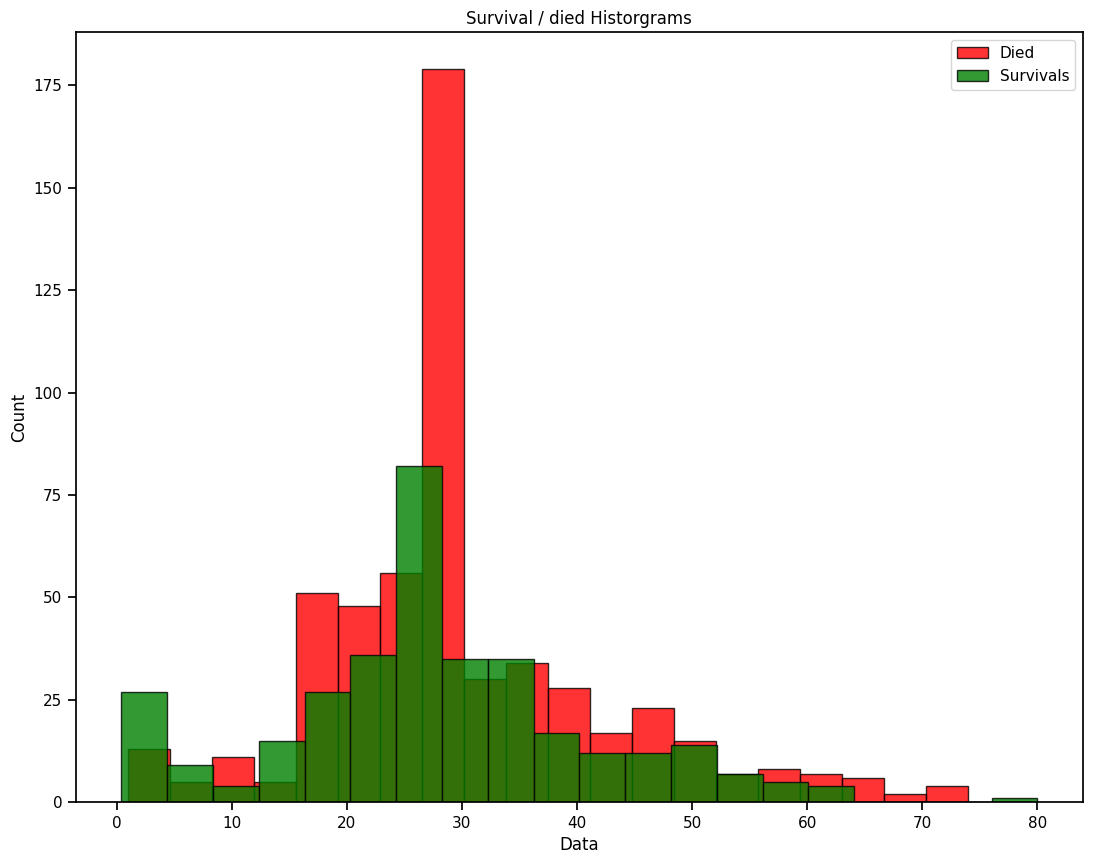

In [189]:
#g = sb.histplot(data = df_train[df_train['Survived'] == 1], x= 'Age')
plt.figure(figsize=(13,10))

plt.hist(df_train[df_train['Survived'] == 0]['Age'],bins=20, alpha=0.8, label="Died" , edgecolor = "black", color = 'red')
plt.hist(df_train[df_train['Survived'] == 1]['Age'],bins=20, alpha=0.8, label="Survivals" ,edgecolor = "black", color = 'green')
plt.xlabel("Data")
plt.ylabel("Count")

plt.title("Survival / died Historgrams")
plt.legend(loc='upper right')

<div class="alert alert-block alert-success">
<b>Conclusion 5:</b> it seems like Survivals increase around the median age which is "28-29". Childrens and old people could not survive. As a result , as we go far way from the median the change of survival decrease alot </div>

><mark>6.Survival Vs Fare</mark>

In [190]:
df_train["Fare"].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

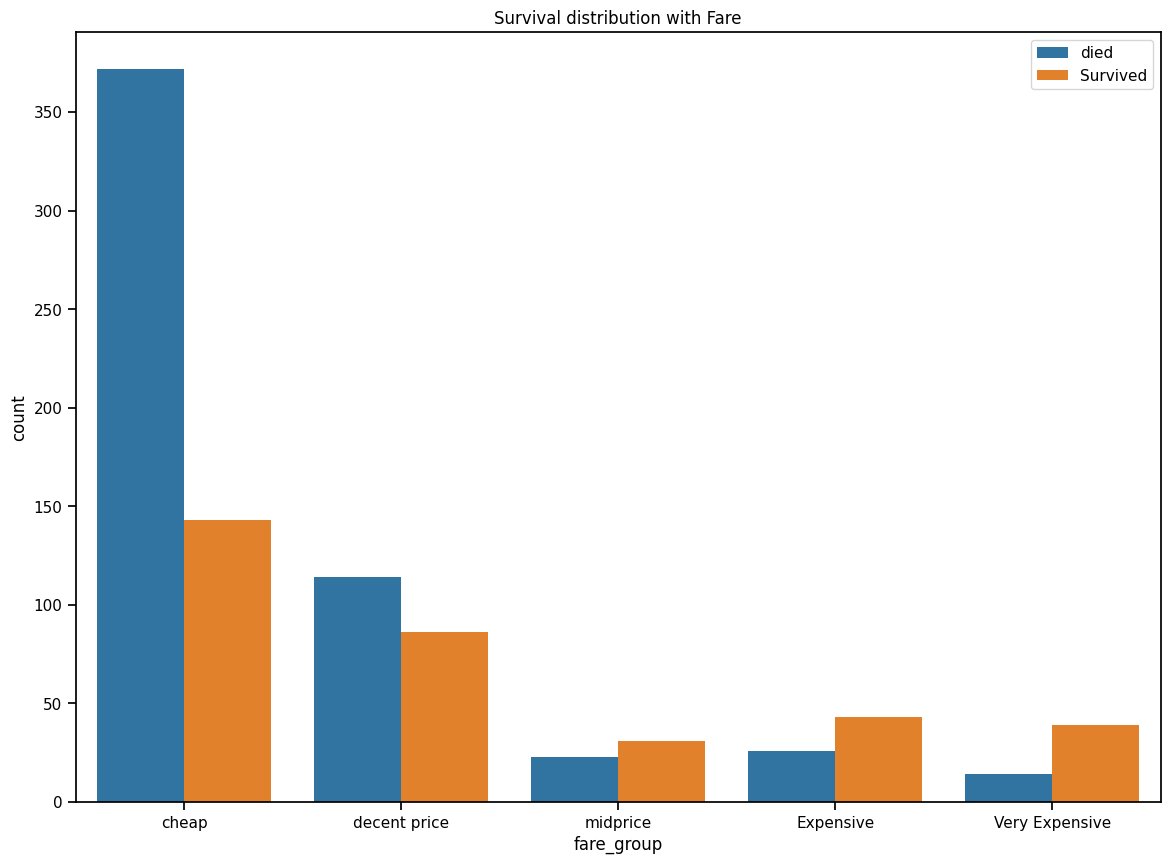

In [191]:
df_train["fare_group"] = pd.cut(df_train["Fare"], [-1, 20, 40, 60, 100 , 530], labels=["cheap", "decent price", "midprice",  "Expensive" , "Very Expensive"])
df_test["fare_group"] = pd.cut(df_test["Fare"], [-1, 20, 40, 60, 100 , 530], labels=["cheap", "decent price", "midprice",  "Expensive" , "Very Expensive"])

plt.figure(figsize = (14 ,10 ))
sb.countplot(x=df_train['fare_group'], hue=df_train['Survived'])
plt.title('Survival distribution with Fare')
plt.legend(labels=['died', 'Survived'])

<div class="alert alert-block alert-success">
<b>Conclusion 6:</b> from above table and bar graph. it seems that the chance of passenger that has cheap price has more chace of dying than others. Passengers with a decent_price has more change of living</div>

><mark>6.Survival Vs Title</mark>

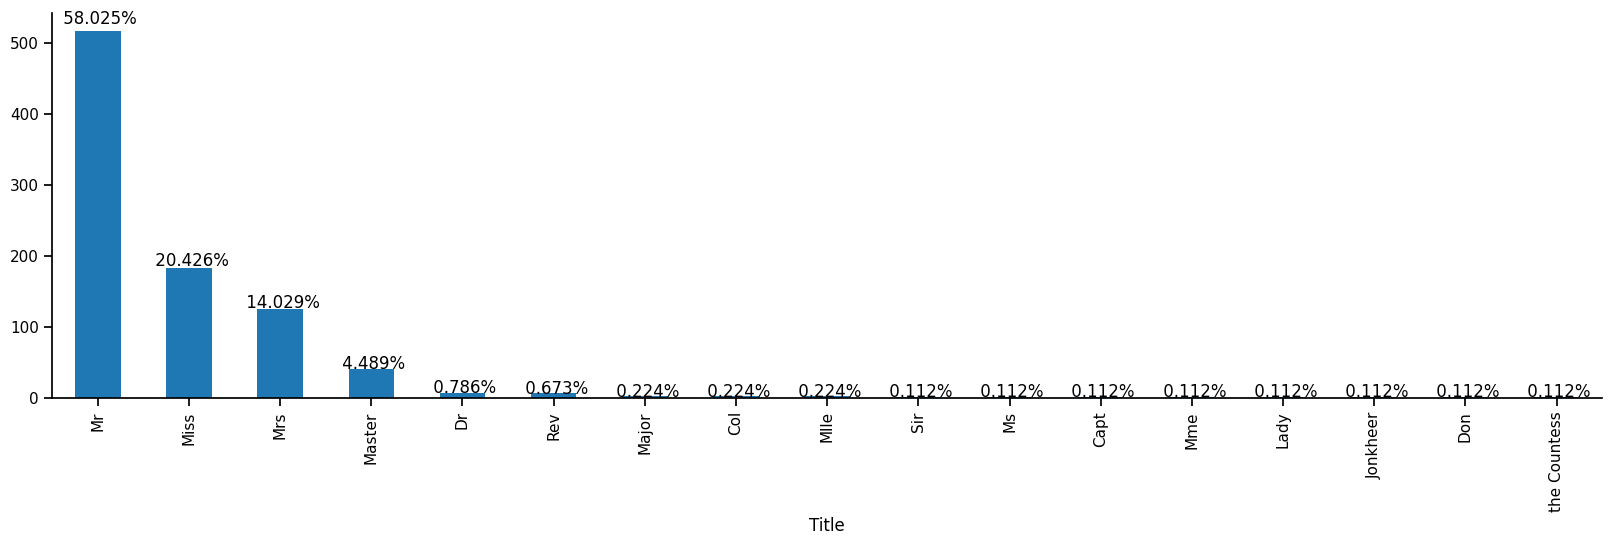

In [192]:
plt.figure(figsize=(20,5))
graph = df_train.value_counts('Title').plot(kind = "bar")
graph.spines['right'].set_visible(False)
graph.spines['top'].set_visible(False)
for i in graph.patches: 
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy() 
    graph.annotate(f'{height/len(df_train) : .3%}', (x + width/2, y + height*1.02),ha='center')

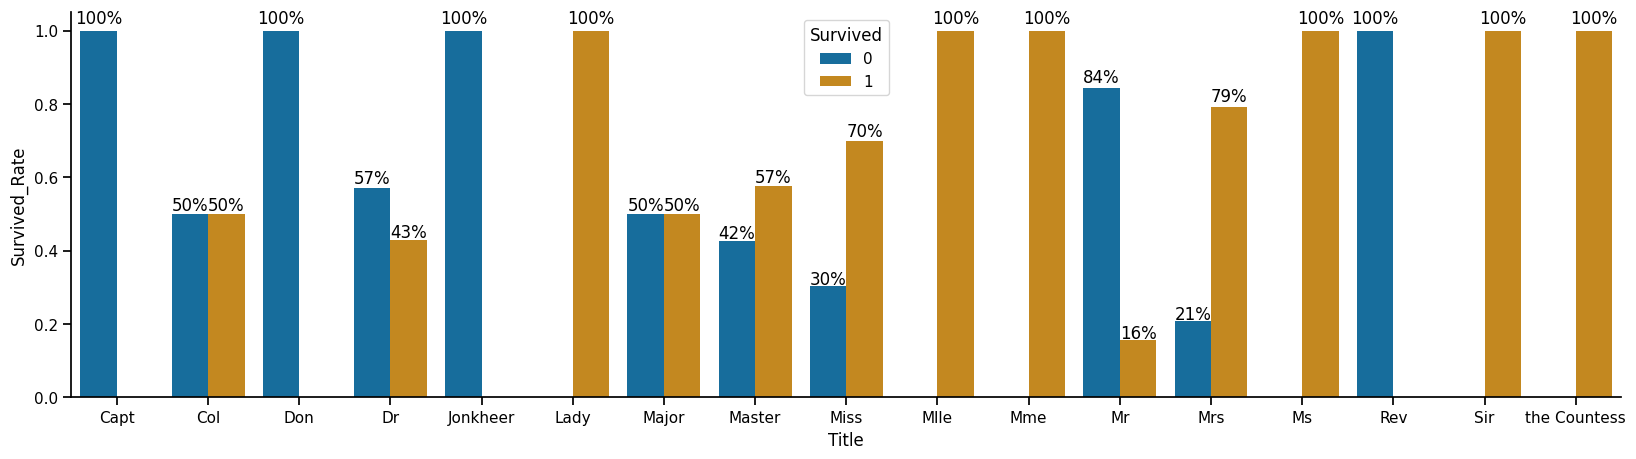

In [193]:
plt.figure(figsize=(20,5))
g= sb.barplot(data = df_train.groupby('Title')['Survived'].value_counts(normalize=True).to_frame().rename(columns= {"Survived":"Survived_Rate" }).reset_index() , x= "Title" , y= "Survived_Rate" ,hue = "Survived" , palette=sb.color_palette('colorblind', 10),width = 0.8)
sb.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
for p in g.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    g.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

Conlusion: 
- The captain goes down with the ship because sea captain holds ultimate responsibility for both his ship and everyone embarked on it, and that in an emergency, he will either save them or die trying.
- from the title analysis,   ladyies, Miss, Mrs and Ms have very high chance of survival than any other titles 



><mark>6.Survival Vs Cabin</mark>

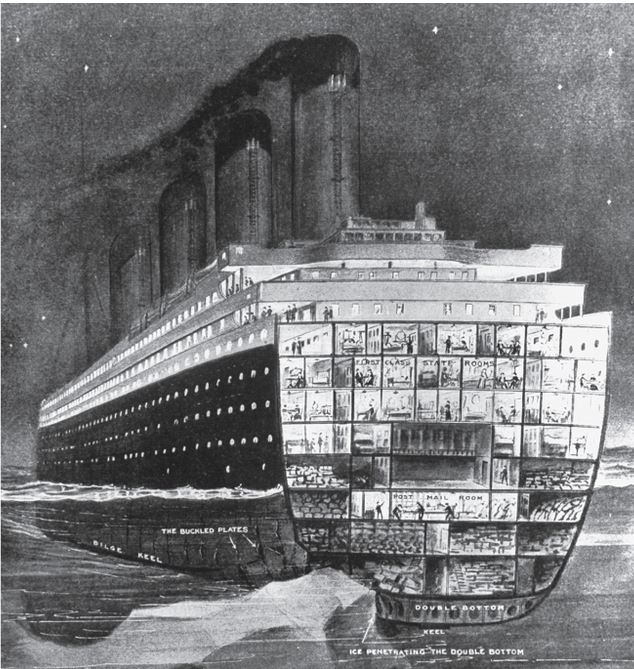

most of the cabins consist of a single letter at the beginning followed by a 2 or three digit number. It seems logical that the letter would represent the deck or section of boat where the cabin was located followed by the room number. It would seem that if you knew the section of the boat where someone was staying it would give you insight into their chances of survival. 

In [194]:

df_cabin = df_train[df_train['Cabin'].isnull() == False]['Cabin'].to_frame()
df_cabin['Deck'] = df_cabin['Cabin'].str[0] 
df_cabin['room']= df_cabin['Cabin'].str.slice(1,5).str.extract("([0-9]+)" , expand = False).astype("float")
df_cabin['Survived'] = df_train['Survived']
df_cabin

,Cabin,Deck,room,Survived
ID,,,,
2,C85,C,85.0,1
4,C123,C,123.0,1
7,E46,E,46.0,0
11,G6,G,6.0,1
12,C103,C,103.0,1
...,...,...,...,...
872,D35,D,35.0,1
873,B51 B53 B55,B,51.0,0
880,C50,C,50.0,1


In [195]:
df_cabin.groupby('Deck')['Survived'].value_counts().sort_index(ascending=True).to_frame().rename(columns= {"Survived":"Survived_Rate" }).reset_index()

,Deck,Survived,Survived_Rate
0,A,0,8
1,A,1,7
2,B,0,12
3,B,1,35
4,C,0,24
5,C,1,35
6,D,0,8
7,D,1,25
8,E,0,8
9,E,1,24


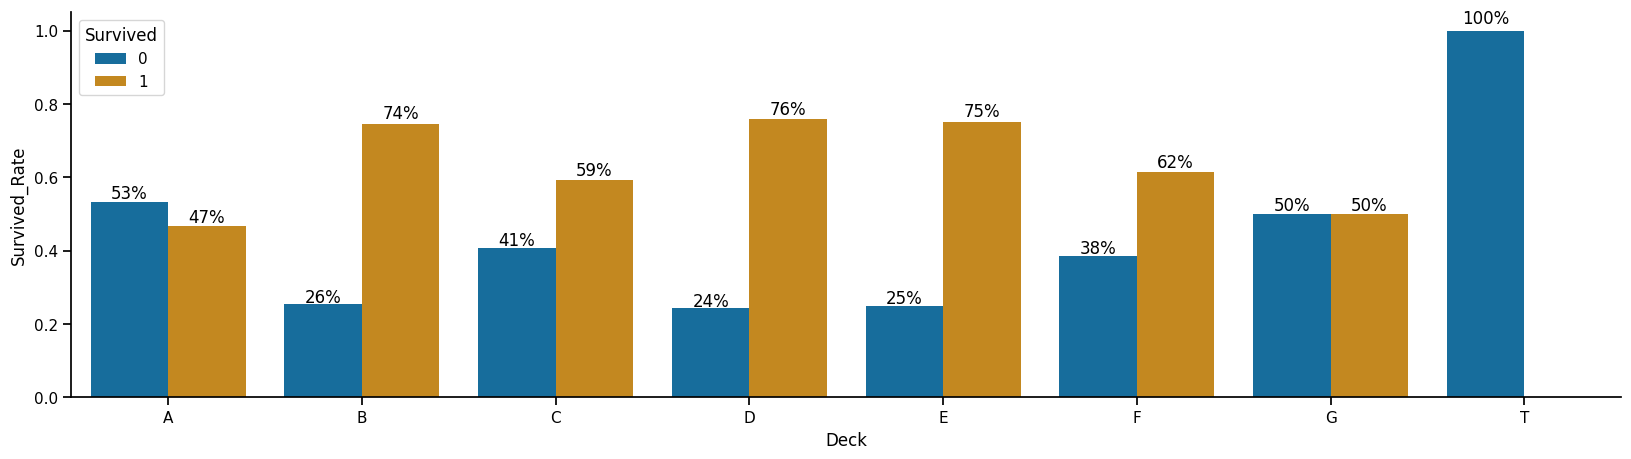

In [196]:
plt.figure(figsize=(20,5))
g= sb.barplot(data = df_cabin.groupby('Deck')['Survived'].value_counts(normalize = True).sort_index(ascending=True).to_frame().rename(columns= {"Survived":"Survived_Rate" }).reset_index(), x= "Deck" , y= "Survived_Rate" ,hue = "Survived" , palette=sb.color_palette('colorblind', 10),width = 0.8)
sb.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
for p in g.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    g.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

it seems that passengers in the middle decks have more surival chance than others. Thus, we can extract these variables and create a new feature called 'Deck' that represents the deck of the cabin. Moreover, we will convert the feature into a numeric variable. The missing values will be converted to zero.

In [197]:
df_train['Deck'] = df_train['Cabin'].str[0] 
df_test['Deck'] = df_test['Cabin'].str[0] 

In [198]:
df_train.drop(['Cabin'] , axis = 1 , inplace = True)
df_test.drop(['Cabin'] , axis = 1 , inplace = True)


In [199]:
df_train['Deck'].fillna("N" , inplace = True)
df_test['Deck'].fillna("N" , inplace = True)

In [200]:
df_train

,Survived,class,Sex,Age,Sibiling_Spouse,Parent_Child,Fare,Port,Title,family_size,fare_group,Deck
ID,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr,1,cheap,N
2,1,1,female,38.0,1,0,71.2833,C,Mrs,1,Expensive,C
3,1,3,female,26.0,0,0,7.9250,S,Miss,0,cheap,N
4,1,1,female,35.0,1,0,53.1000,S,Mrs,1,midprice,C
5,0,3,male,35.0,0,0,8.0500,S,Mr,0,cheap,N
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,Rev,0,cheap,N
888,1,1,female,19.0,0,0,30.0000,S,Miss,0,decent price,B
889,0,3,female,28.0,1,2,23.4500,S,Miss,3,decent price,N


><mark>6.Survival Vs (Sex and class)</mark>

In [201]:
df_train.pivot_table(index='class', columns='Sex', values='Survived')

Sex,female,male
class,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


Text(0.5, 1.0, 'Survival ratio by passenger class and sex')

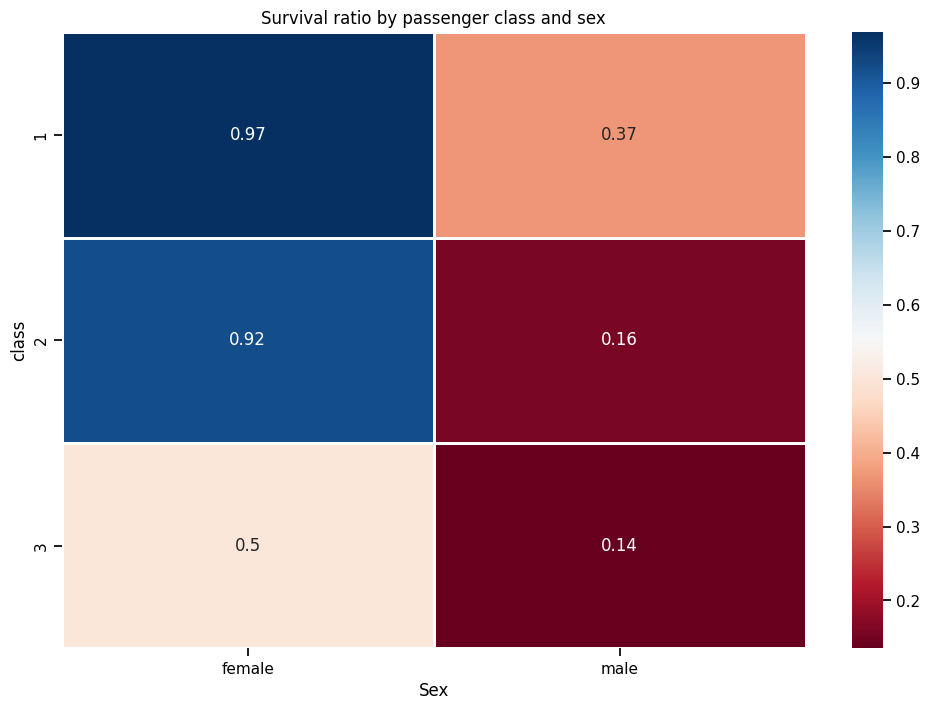

In [202]:

plt.figure(figsize=(12,8))
sb.heatmap(df_train.pivot_table(index='class', columns='Sex', values='Survived'),  linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title('Survival ratio by passenger class and sex')


><mark>6.Survival Vs (Sex and family_size)</mark>

In [203]:
df_train.pivot_table(index='family_size', columns='Sex', values='Survived')

Sex,female,male
family_size,,
0,0.785714,0.155718
1,0.816092,0.243243
2,0.775510,0.396226
3,0.842105,0.500000
4,0.250000,0.000000
5,0.375000,0.000000
6,0.375000,0.250000
7,0.000000,0.000000
10,0.000000,0.000000


Text(0.5, 1.0, 'Survival ratio by passenger class and sex')

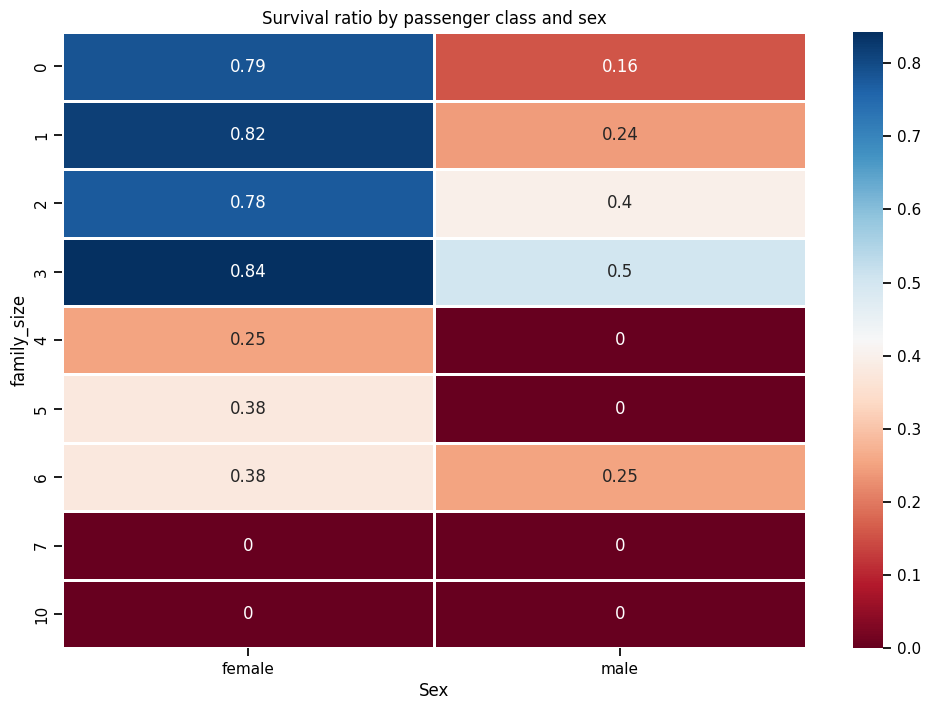

In [204]:
plt.figure(figsize=(12,8))
sb.heatmap(df_train.pivot_table(index='family_size', columns='Sex', values='Survived'),  linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title('Survival ratio by passenger class and sex')

conclusion:
- it seems that every one with family size of 4 or more died
- females with family size less than 4 has higher chance of survival than males

## <mark>4.data Preparing for modelling </mark>

In [205]:
df_train.drop(['Sibiling_Spouse' , 'Parent_Child'] , axis = 1 , inplace = True)

In [206]:
df_test.drop(['Sibiling_Spouse' , 'Parent_Child'] , axis = 1 , inplace = True)

Sex Mapping

In [207]:
sex_mapping = {"male": 0, "female": 1}
df_train["Sex"]= df_train['Sex'].map(sex_mapping)

In [208]:
df_test["Sex"]= df_test['Sex'].map(sex_mapping)


Title Map

Mr : 0
Miss : 1
Mrs: 2
Others: 3


In [209]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
df_train["Title"]= df_train['Title'].map(title_mapping)
df_test["Title"]= df_test['Title'].map(title_mapping)


mapping of ports using dummy variables

In [210]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Port'], prefix='Port')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Port'], prefix='Port')], axis=1)


mapping of decks using dummy variables

In [211]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Deck'], prefix='Deck')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Deck'], prefix='Deck')], axis=1)
df_train.drop(['Deck_N'] , axis = 1 , inplace = True)
df_test.drop(['Deck_N'] , axis = 1 , inplace = True)


In [212]:
df_train.drop(["fare_group", 'Port', 'Deck'], axis = 1 , inplace = True)
df_test.drop(["fare_group", 'Port' , 'Deck'], axis = 1 , inplace = True)

<Axes: title={'center': 'Pearson Correlation of Features'}>

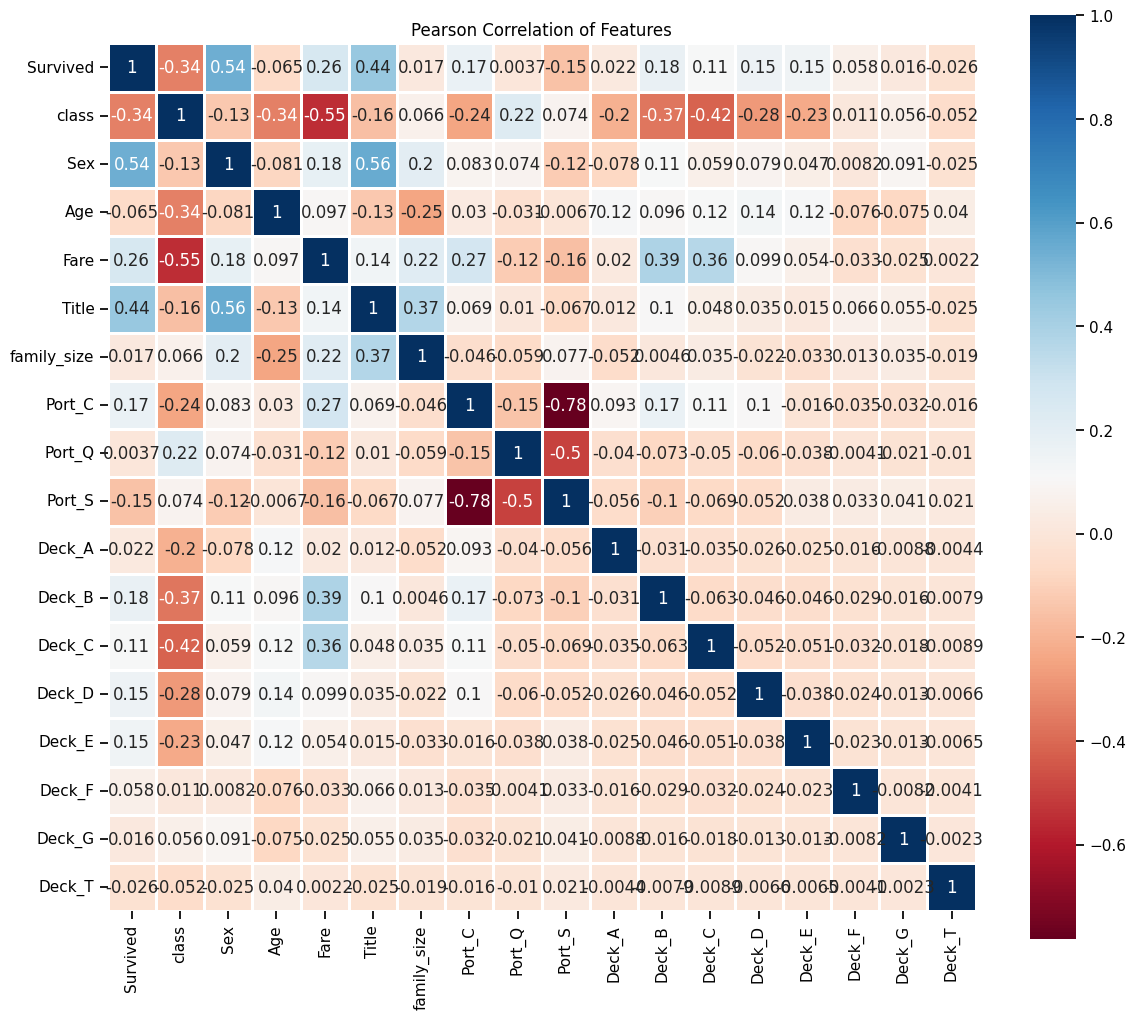

In [213]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features')
sb.heatmap(df_train.corr(), linewidths=1,
           square=True, cmap='RdBu', linecolor='white', annot=True)

## <mark>5.Modeling </mark>

In [214]:
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
y = df_train.Survived 
df_train.drop(['Survived'], axis=1 , inplace= True) 
X = df_train[list(df_train.columns)]

In [215]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model = DecisionTreeClassifier(random_state =1 )

model.fit(train_X ,train_y)


DecisionTreeClassifier(random_state=1)

In [216]:
val_predictions = model.predict(val_X)

In [217]:
import sklearn.metrics as metrics
metrics.accuracy_score(val_y , val_predictions, normalize=True, sample_weight=None)

0.757847533632287

>Conclusion

1-From the heatmap we conclude that women in the 1st class had the highest chance of survival (97%), whereas men in the 3rd class had the lowest chance of survival (14%). Note that women in each class had higher survival ratio. Even women from 3rd class had higher chance of surviving the catastrophe than men from 1st class.

2-it seems that the chance of passenger that has cheap price has more chace of survival than others

3-it seems like Survivals increase around the median age which is "28-29". Childrens and old people could not survive. As a result , as we go far way from the median the change of survival decrease alot.

4-passengers having 5 or 8 spouses/Sibillings have lower chance of survival. Best chance of survival lie between having 1 or 2 percent.

5-It seems that there is no exact relation between increasing the number of parents and number of survival because the percentages of if survival increase until it reaches '3' then decrease again.

6-Despite the exist of high percentage of male in the data . the percentage of Survived female is more than Survived male.Females have higher chance of survival  (74.2038 %).
7-passengers from 1st class are having a highest chance of survival (62.96%) , On the other hand , the lowest chance to survival are to 3rd class (24.23%)
